# Lord of the Rings - Explainer notebook

This notebook is part B of the final project for the course Social graphs and interactions (02805) in the Fall of 2021.

![Alt Text](https://i.imgur.com/fVDH5bN.gif)

# Table of contents
* 1. [Motivation](#motivation)
* 2. [Basic stats](#basicstats)
  * 2.1 [Data cleaning and preprocessing](#datacleaningandpreprocessing)
    * 2.1.1 [Books](#2.1.1books)
    * 2.1.2 [Transcripts](#2.1.2transcripts)
    * 2.1.3 [Wikis](#2.1.3wikis)
  * 2.2 [Dataset stats](#datasetstats)
    * 2.2.1 [Books](#2.2.1books)
    * 2.2.2 [Transcripts](#2.2.2transcripts)
    * 2.2.3 [Wikis](#2.2.3wikis)
* 3. [Tools, theory and analysis](#tools)
  * 3.1 [Books](#3.1books)
  * 3.2 [Scripts](#3.2transcripts)
  * 3.3 [Wikis](#3.3wikis)
  * 3.4 [Comparison - Books and Movies](#3.4booksmovies)
* 4. [Discussion](#discussion)
* 5. [Contributions](#contributions)

# 1. Motivation <a name="motivation"></a>
 ####  What is your dataset?
There are multiple different datasets used for this analysis:
  1. #### Books
    * The text files for all the Lord of the Rings books where downloaded from the internet.
      * http://www.glozman.com/textpages.html
  2. #### Movie transcripts
    * Some text explaining
      * link
      * link
      * link
  

3. #### Wiki pages
The Lord of the Rings fandom wiki was used as a datasource. From the wiki a list of characters for each of the three movies was downloaded. The character lists were combined and saved in the file:

    * characters.csv
    
Using that list the wiki page for each character was extracted. In total 121 files were downloaded, which are 1,24MB in total.

* #### Why did you choose this/these particular dataset(s)?
These particular datasets were chosen ...

Each dataset was chosen for different reasons. 

The books are used to perform natural language processing. They will be used to analyze the sentiment for each chapter in the books, the distribution of interesting words throughout the books and generate word clouds of frequently used words, among other things.

The transcripts of the movies are used for natural language processing aswell. As the transcripts specify which character says throughout each movie, they can easily be used to analyze the sentiment of major characters, create word clouds for those characters and generate word clouds for each of the movies, to compare to the books.

The wikis are the primary source of information for each character. As the wikis use hyperlinks when refrencing other characters, they can be used generate a network of the characters, where each refrence is represented as a link. On each character wiki page there is also information about the characters race, gender and culture, which will analyzed as well.

* #### What was your goal for the end user's experience?
The goal was a fun webpage...

The video below highlights the project idea:

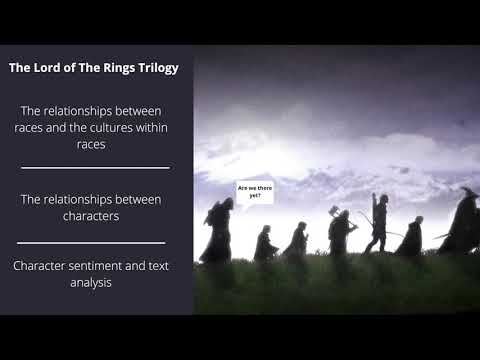

In [200]:
from IPython.display import YouTubeVideo
YouTubeVideo('8R3iaZLClng', width=800, height=450)

# 2. Basic stats. Let's understand the dataset better <a name="basicstats"></a>

In [201]:
# Imports
import networkx as nx
import pandas as pd
import re,json
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from fa2 import ForceAtlas2
from community import community_louvain
import matplotlib.cm as cm
from collections import Counter
import collections
import itertools
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# from bokeh.io import output_notebook, show, save
# from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
# from bokeh.plotting import figure
# from bokeh.plotting import from_networkx
# from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
# from bokeh.transform import linear_cmap
from IPython.core.display import display, HTML
from IPython.display import IFrame

In [202]:
#The color scheme for the project
colors = ["#708ea2", "#515c68", "#874d28", "#5d5933", "#1e3b23", "#393835"]

plt.rcParams['font.size'] = 40
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

## 2.1 Write about your choices in data cleaning and preprocessing <a name="datacleaningandpreprocessing"></a>

### 2.1.1 Books <a name="2.1.1books"></a>

### 2.1.2 Transcripts <a name="2.1.2transcripts"></a>

The transcripts were downloaded as HTML files from the web. BeautifulSoup was used to remove the HTML tags and only leaving behind the content, i.e. the transcripts themselves. These parsed versions were saved to seperate files.

The descriptions of what was going on onscreen from each transcript was removed. These lines are known as action lines. These action lines varied in their denotions. For the "Two towers", the action lines was denoted by square brackets. Once these action lines had been removed, all there is left is just the spoken words of the characters. This cleaned transcript was saved in a separate file.

### 2.1.3 Wikis <a name="2.1.3wikis"></a>

The wikis were well structed and followed the same layout, however a few of them had to be polished. The wiki for Frodo Baggins had to be parsed as the information about race and culture was all squashed together. Also, for Frodo, it was noticed that Frodo Baggins had no race specified on his wiki, at the time of retrival. This is a trivial error, so hice race(hobbits), was added to his description.

The wiki page Shelob had to be edited a bit aswell. In the culture section a \<ref\>\Some text</ref\> as it was messing up the culture attribute for that character.

The page for the "Witch-king of Angmar" specified the race (Men) in singular, this was changed to "Men" to be consistant with the rest of the data set. Similarly for "Meriadoc Brandybuck","Hamfast Gamgee" and "Lobelia Sackville-Baggins", their race was changed from "Hobbit" to "Hobbits" to be consistant with the rest of the data.

## 2.2 Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A) <a name="datasetstats"></a>

### 2.2.1 Wikis <a name="2.2.1wikis"></a>

### 2.2.2 Transcripts <a name="2.2.2transcripts"></a>



### 2.2.3 Books <a name="2.2.3books"></a>

# 3. Tools, theory and analysis <a name="tools"></a>

* Talk about how you've worked with text, including regular expressions, unicode, etc.
* Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
* How did you use the tools to understand your dataset?

## 3.1 Wikis <a name="3.1wikis"></a>

### 3.1.1 Network <a name="3.1.1network"></a>

In [203]:
charactersDf = pd.read_csv('characters.csv')

In [204]:
def nodeInfo(text):
    genderRe1 = re.findall(r'(?:gender=\s)([a-zA-Z]*)(?:<.*?\/>)',text)
    if genderRe1:
        if genderRe1[0] == '':
            gender = 'Unknown'
        else:
            gender = genderRe1[0]
    else:
        gender = 'Unknown'
    raceRe2 = re.findall(r'(?i)(?:race\s*=\s*)\[\[(.*?)(?:\|.*?)?\]\]',text)

    if raceRe2:
        race = raceRe2[0] 
    else:
        race = 'Unknown'

    cultureRe1 = re.findall(r'(?i)(?:culture\s*=[^\S\n]*)(.*)(?:\||\n)',text)
    if cultureRe1:
        cultureRe2 = re.findall(r'\[\[(.*?)(?:\|.*?)?\]\]',cultureRe1[0])
        culture = cultureRe2
    else:
        culture = ['Unkown']

    pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
    square = re.findall(pattern1,text)
    edges = square
    

    return gender,race,culture,edges

In [205]:
def filterC(chars,charList):
    ret = []
    i = 0
    # print(charList)
    for i in range(len(chars)):
        # print(name, name in charList,type(name))
        if chars[i] in charList:
            ret.append(chars[i])
    return ret

In [206]:
def tuples(name, list):
    tmp = []
    for item in list:
        tmp.append((name,item))
    return tmp

In [207]:
nameList = list(charactersDf.Name)
G = nx.DiGraph()

for row in charactersDf.iterrows():
    name= row[1]['Name']
    with open("txtfiles/" + name + '.txt',encoding='utf-8') as f:
        text = f.read()
    g,r,c,e = nodeInfo(text)
    charList = tuples(name,filterC(e,list(charactersDf.Name)))
    G.add_node(name,race = r, gender = g, cultures = c)
    # networkInfoDf = networkInfoDf.append({"name":name,"race":r,"gender":g,"charlist":tuples(name,charList),"role":row[1]['type']},ignore_index=True)
    G.add_edges_from(charList)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 121
Number of edges: 710
Average in degree:   5.8678
Average out degree:   5.8678


In [208]:
#Extracting the giant component
GunD = G.to_undirected()
giant = list(max(nx.connected_components(GunD), key=len))
gcc = G.subgraph(giant).copy()
print(nx.info(gcc))

Name: 
Type: DiGraph
Number of nodes: 115
Number of edges: 710
Average in degree:   6.1739
Average out degree:   6.1739


## TODO
Here we add a text on how now that we have a network we can start analysing it!

### 3.1.2 Races <a name="3.1.2races"></a>

One of the things that makes the Lord of the Rings saga so interesting is the fact that there are multiple different races. The races each have their features and personality traits. For example the Dwarfs are a proud and stern race. They are short but fierce fighters, extremely loyal and great craftsmen. Men however are a great deal taller but have a short lifespan relative to many of the other races and are burdened with a great desire for power.

In [209]:

#Finding all races and the number of characters in each race
races = set()
raceCount = {}

#Add all races from the network to a set of races
for node in gcc.nodes(data=True):
    if bool(node[1]):
        races.add(node[1]['race'])

#initializing a dictionary of races
for item in races:
    raceCount[item] = 0
genderCount ={'Male':0,'Female':0,'Unknown':0}

#count how many characters belong to each race
for node in gcc.nodes(data=True):
    if bool(node[1]):
        raceCount[node[1]['race']] = raceCount[node[1]['race']] + 1
        genderCount[node[1]['gender']] = genderCount[node[1]['gender']] + 1

In [210]:
print("All races from the Lord Of The Rings: \n", races)

All races from the Lord Of The Rings: 
 {'Unknown', 'Dwarves', 'Orcs', 'Black Uruks', 'Ent', 'Hobbits', 'Spiders', 'Men', 'Uruk-hai', 'Orc', 'Elf', 'Black Uruk', 'Ents', 'Elves', 'Great Eagles', 'Ainur', 'Half-elven'}


In [211]:
raceDict = collections.defaultdict(list)

#Creating a dictopnary of races and the characters that belong to each race
#Some mapping was needed to clean the race data, for example Ent -> Ents

for node in gcc.nodes(data=True):
    if bool(node[1]):
        if node[1]['race'] == "Ent":
            raceDict["Ents"].append(node[0].lower())
        elif node[1]['race'] == "Orc":        
            raceDict["Orcs"].append(node[0].lower())
        elif node[1]['race'] == "Black Uruk":        
            raceDict["Black Uruks"].append(node[0].lower())
        elif node[1]['race'] == "Elf":
            raceDict["Elves"].append(node[0].lower())
        else: 
            raceDict[node[1]['race']].append(node[0].lower())

#Creating a json file using the race dictionary
with open("races.json", "wt", encoding='utf-8') as outfile:
    json.dump(raceDict, outfile, ensure_ascii=False)

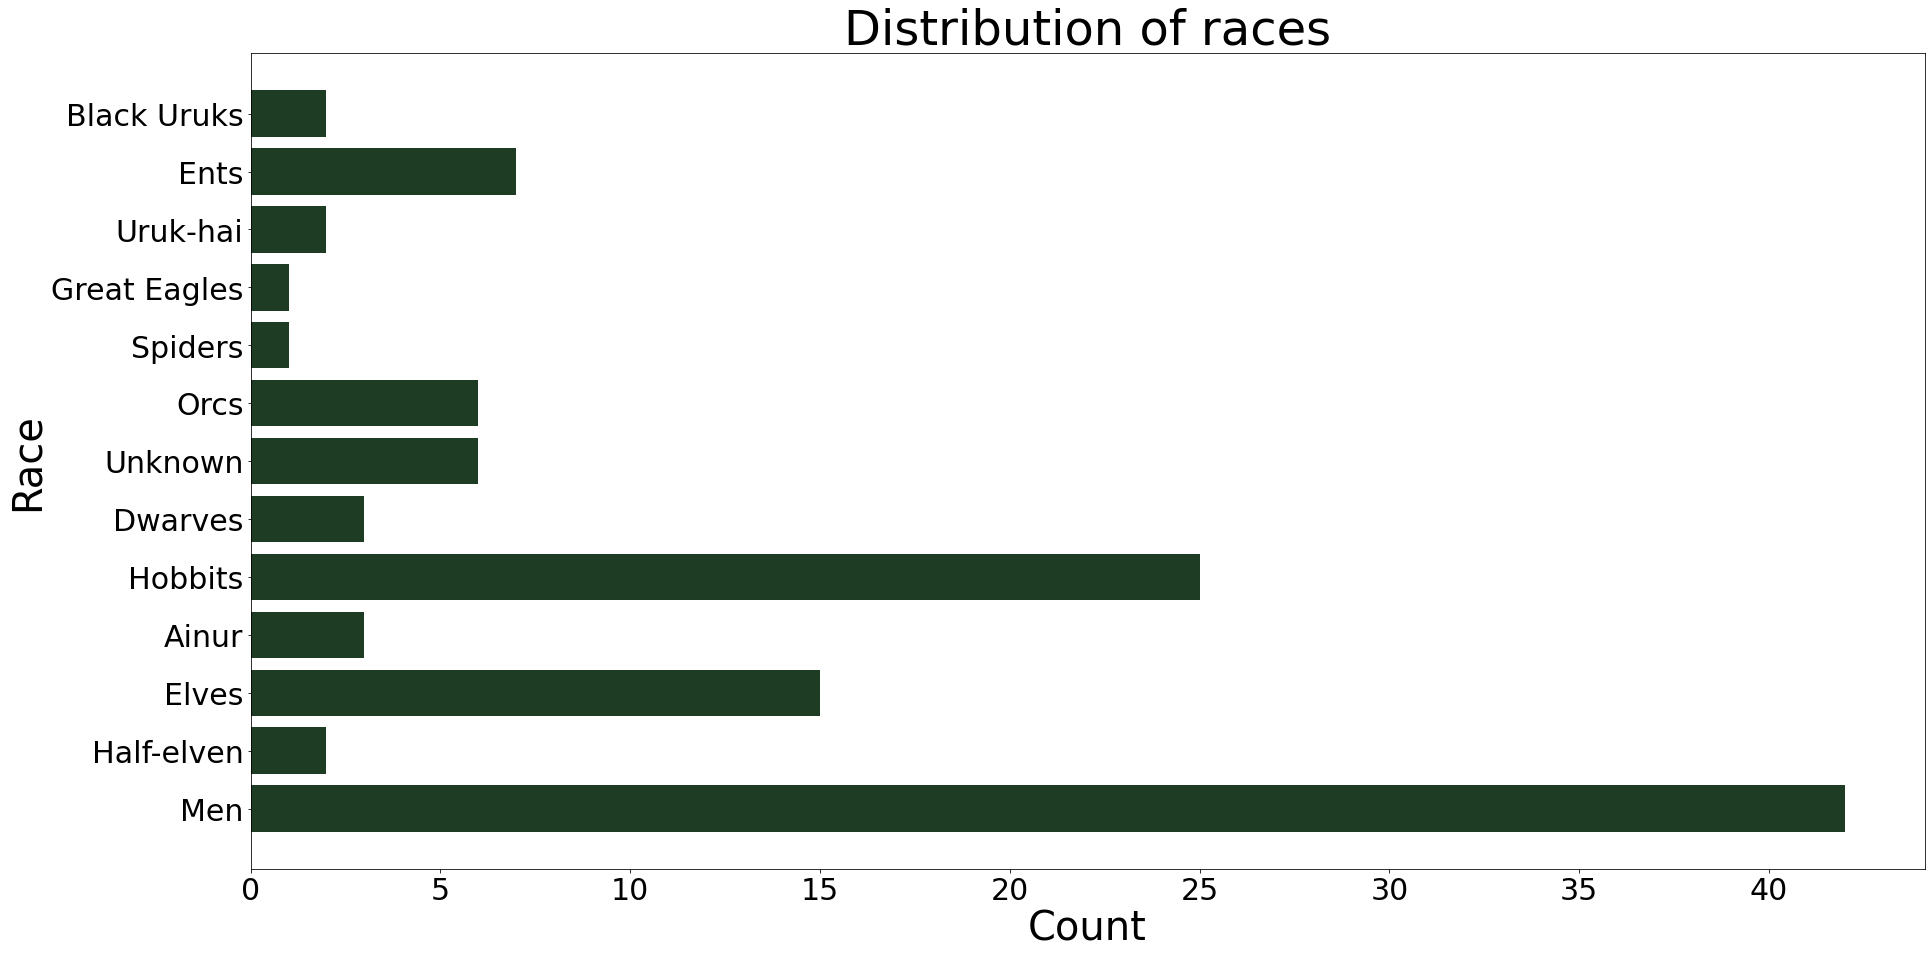

In [212]:
#Finding how many characters are within each race
raceLengths = []
for key, value in raceDict.items():
    raceLengths.append(len(value))

#A plot showing the distribution of races
fig,ax = plt.subplots(figsize=(30,15))
ax.barh(list(raceDict.keys()),raceLengths,align = 'center',color = '#1e3b23')
ax.set_xlabel('Count')
ax.set_ylabel('Race')
ax.set_title('Distribution of races')

plt.show()

Most of the characters in the Lord of the Rings saga are men. In second place there are the hobbits and in third place are the elves.

### 3.1.3 Cultures <a name="3.1.3cultures"></a>

The characters of the Lord Of The Rings saga belong not only to races but cultures as well. A character can belong to multiple races. For example Aragorn belongs to Dúnedain of Arnor, House of Isildur and House of Telcontar.

In [213]:
#Finding all cultures and the number of characters in each culture
cultures = set()
cultureCount = {}

#Add all cultures from the network to a set of cultures
for node in gcc.nodes(data=True):
    if bool(node[1]):
        for i in node[1]['cultures']:
            cultures.add(i)

#initializing a dictionary of cultures
for item in cultures:
    cultureCount[item] = 0 

#count how many characters belong to each culture
for node in gcc.nodes(data=True):
    if bool(node[1]):
        for i in node[1]['cultures']:
            cultureCount[i] = cultureCount[i] + 1

In [214]:
print("There are", len(cultures),  "cultures in the Lord Of The Rings saga", )

There are 71 cultures in the Lord Of The Rings saga


Since there are multiple cultures within multiple races it was decided to focus on the cultures of men, hobbits and elves.

In [215]:
#Collecting sets of the cultures of men, hobbits and elves

humanCulture = set()
humanCultureCount = {}

hobbitCulture = set()
hobbitCultureCount = {}

elfCulture = set()
elfCultureCount = {}

#Creating the sets of cultures
for node in gcc.nodes(data=True):
    if node[1]['race'] == 'Men':
        for i in node[1]['cultures']:
            humanCulture.add(i)
    elif node[1]['race'] == 'Hobbits':
        for i in node[1]['cultures']:
            hobbitCulture.add(i)
    elif node[1]['race'] == 'Elves':
        for i in node[1]['cultures']:
            elfCulture.add(i)

#Initializing dictionaries for each race culture
for item in humanCulture:
    humanCultureCount[item] = 0 
for item in hobbitCulture:
    hobbitCultureCount[item] = 0 
for item in elfCulture:
    elfCultureCount[item] = 0 

#Populating the race cultures with matching characters
for node in gcc.nodes(data=True):
    if (node[1]['race'] == 'Men' and bool(node[1]['cultures'])):
        for i in node[1]['cultures']:
            humanCultureCount[i] = humanCultureCount[i] + 1
    elif (node[1]['race'] == 'Hobbits' and bool(node[1]['cultures'])):
        for i in node[1]['cultures']:
            hobbitCultureCount[i] = hobbitCultureCount[i] + 1
    elif (node[1]['race'] == 'Elves' and bool(node[1]['cultures'])):
        for i in node[1]['cultures']:
            elfCultureCount[i] = elfCultureCount[i] + 1

#sortong the race culture dictionaries and removing cultures with few characters
sortedCulturesOfMen = dict(sorted(humanCultureCount.items(), key=lambda x:x[1]))
biggestCulturesOfMen = dict(itertools.islice(sortedCulturesOfMen.items(), 18, None))

sortedCulturesOfHobbit = dict(sorted(hobbitCultureCount.items(), key=lambda x:x[1]))
biggestCulturesOfHobbit = dict(itertools.islice(sortedCulturesOfHobbit.items(), 13, None)) 

sortedCulturesOfElf = dict(sorted(elfCultureCount.items(), key=lambda x:x[1]))
biggestCulturesOfElf = dict(itertools.islice(sortedCulturesOfElf.items(), 6, None)) 

print('-------Largest cultures of Men-------')
print(biggestCulturesOfMen)
print('-------Largest cultures of hobbits-------')
print(biggestCulturesOfHobbit)
print('-------Largest cultures of elves-------')
print(biggestCulturesOfElf)
        

-------Largest cultures of Men-------
{'Men of Bree': 3, 'House of Eorl': 4, 'Men of Gondor': 8, 'Rohirrim': 18}
-------Largest cultures of hobbits-------
{'Buckland': 2, 'Stoor': 2, 'Proudfoot': 2, 'Baggins family': 2, 'Gamgee': 4, 'Shire': 20}
-------Largest cultures of elves-------
{'Ñoldor': 2, 'Nandor': 2, 'Rivendell': 2, 'Sindar': 3, 'Silvan Elves': 4, 'Galadhrim': 4}


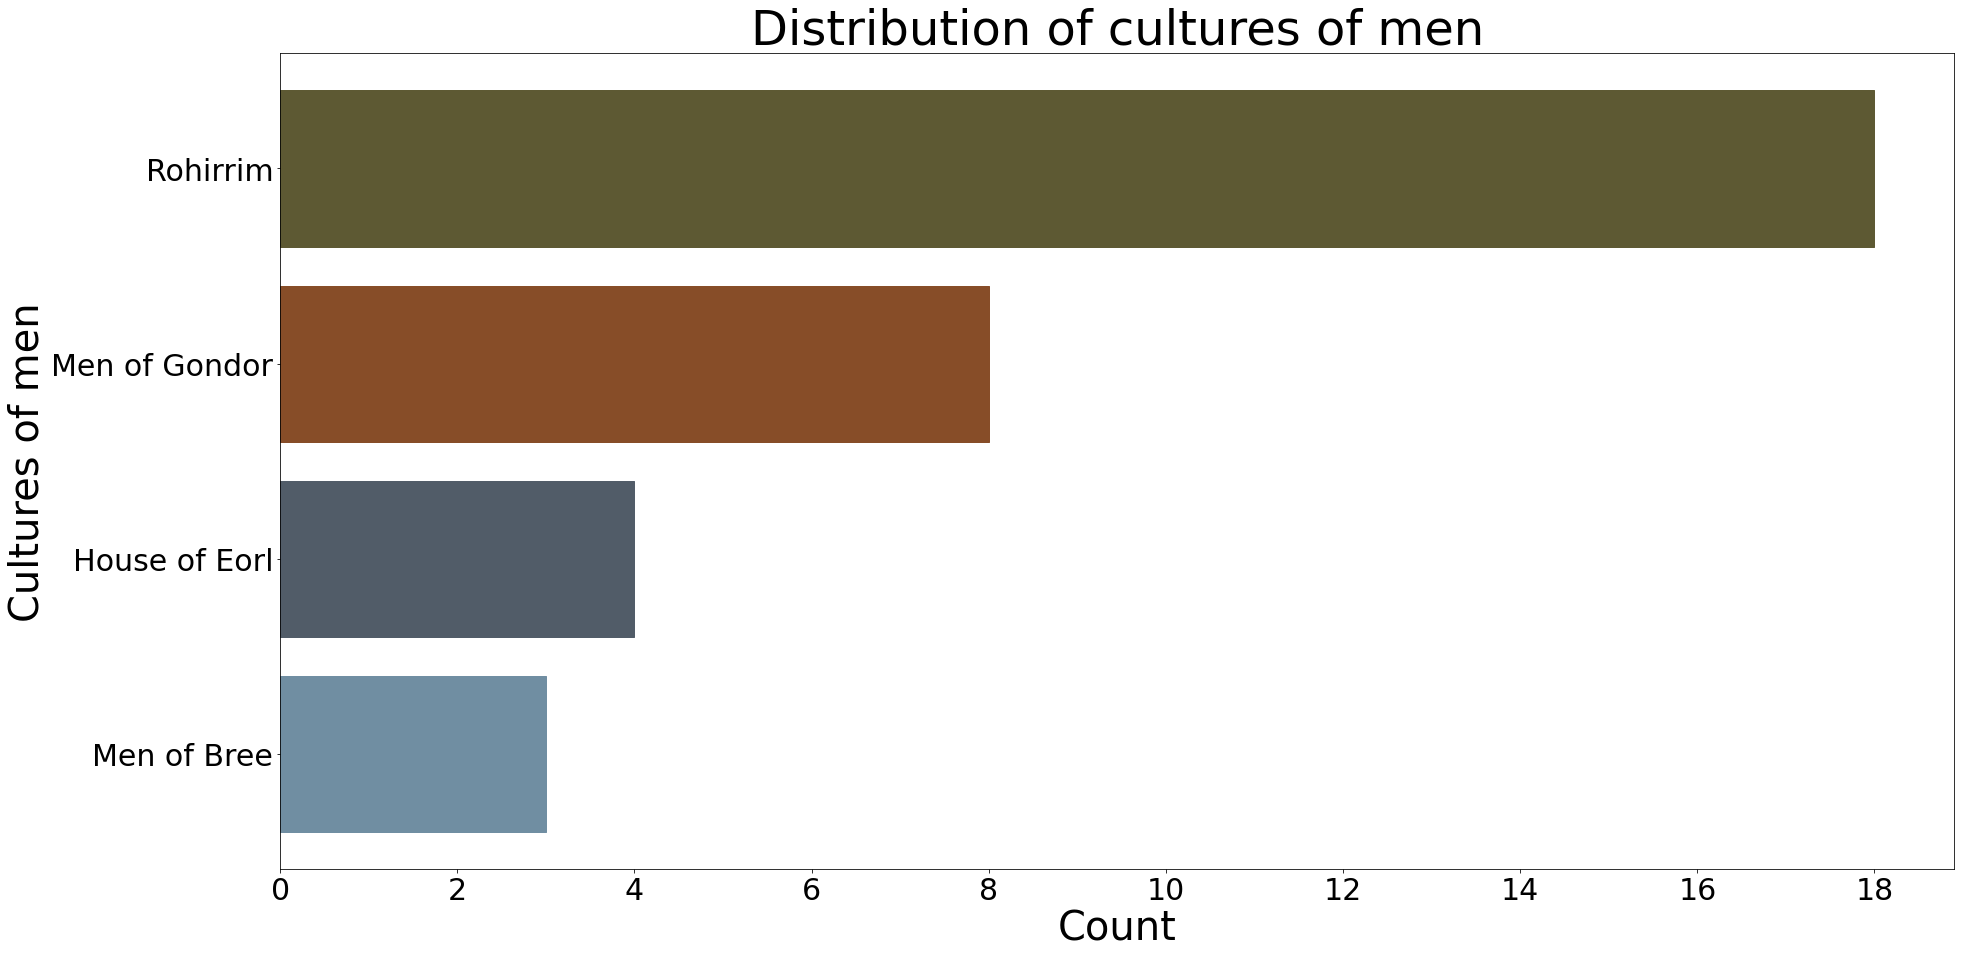

In [216]:
#A graph showing the distributing of cultures of men
fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(list(biggestCulturesOfMen.keys()),biggestCulturesOfMen.values(),align = 'center')
ax.set_xlabel('Count')
ax.set_ylabel('Cultures of men')
ax.set_title('Distribution of cultures of men')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#Adding the pre-defined LOTR colors
for i in range(len(bars)):
   bars[i].set_color(colors[i])

plt.show()

Most of the characters belonging to the race of men are Rohirrin. There is a good number of Men of Gondor but only a handful of characters belonging to the House of Eorl and Men of Bree.

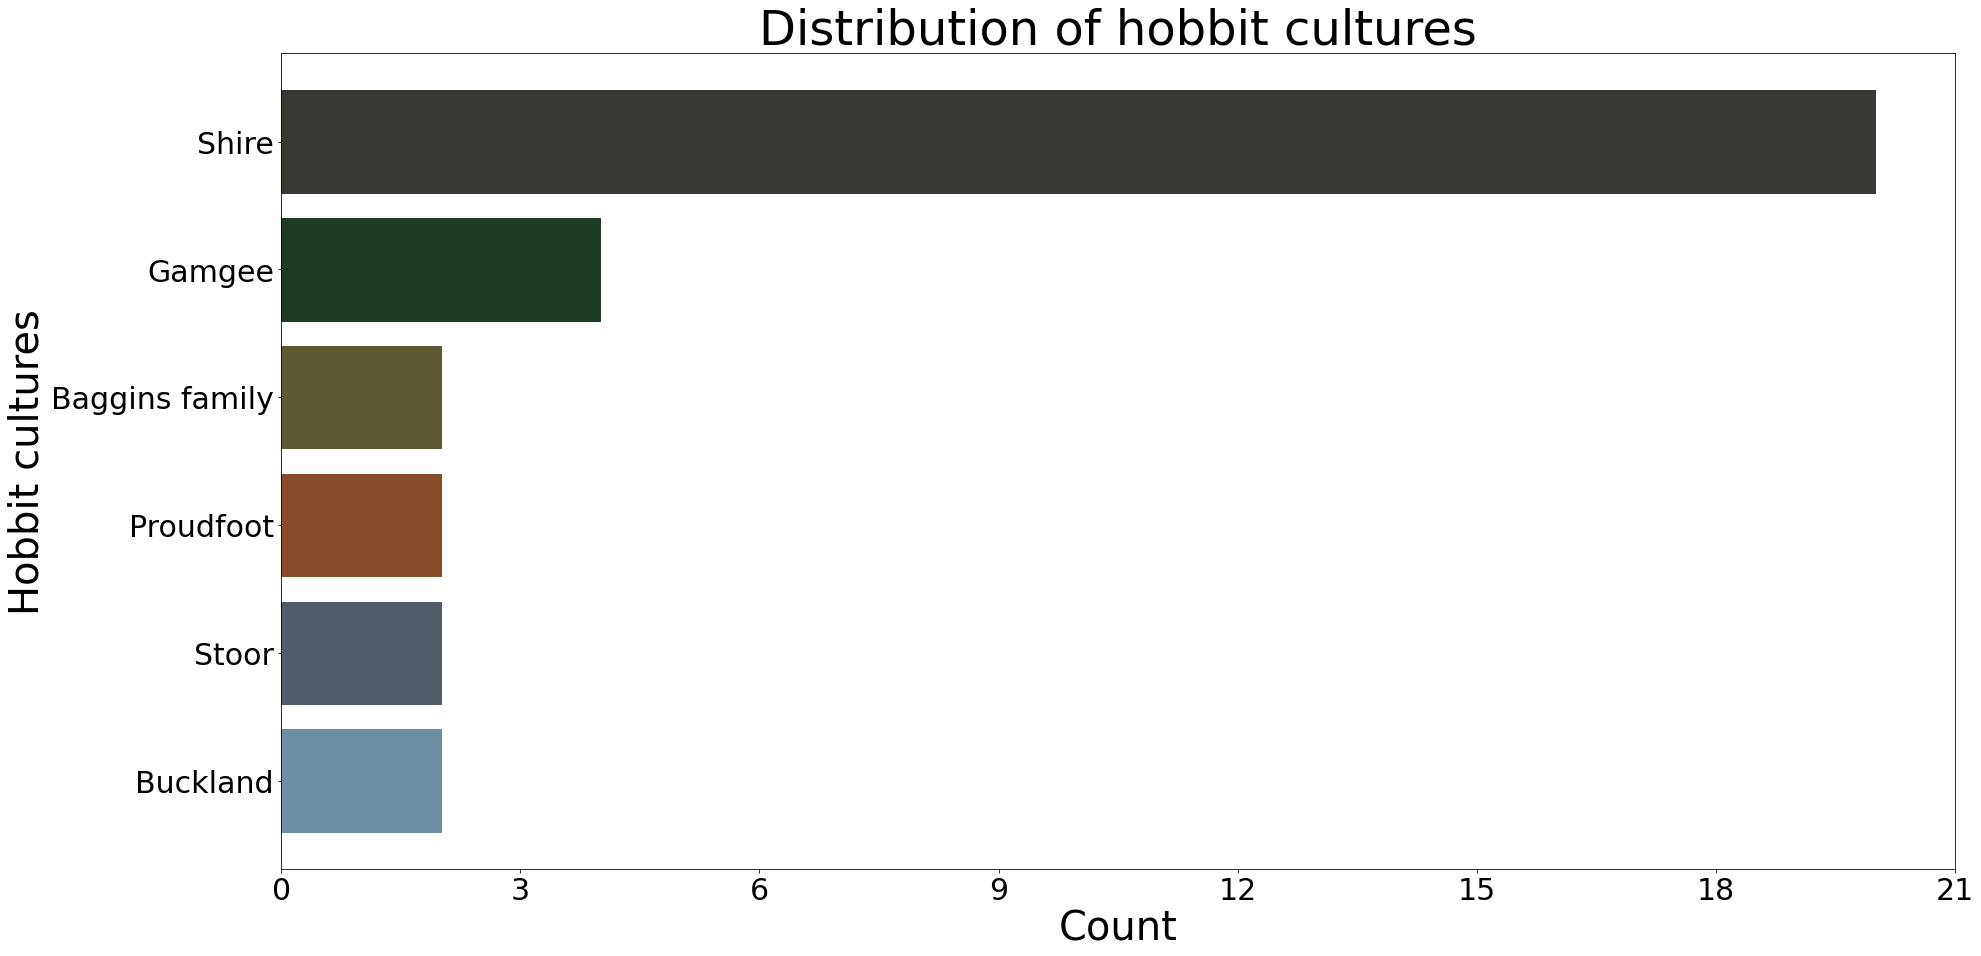

In [217]:
#A graph showing the distributing of cultures of hobbits
fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(list(biggestCulturesOfHobbit.keys()),biggestCulturesOfHobbit.values(),align = 'center')
ax.set_xlabel('Count')
ax.set_ylabel('Hobbit cultures')
ax.set_title('Distribution of hobbit cultures')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#Adding the pre-defined LOTR colors
for i in range(len(bars)):
   bars[i].set_color(colors[i])

plt.show()

The Shire hobbits are by far the largest culture within the hobbit race. This does not come as a surprise since the story begins in Hobbiton, a village located in the center of the Shire.

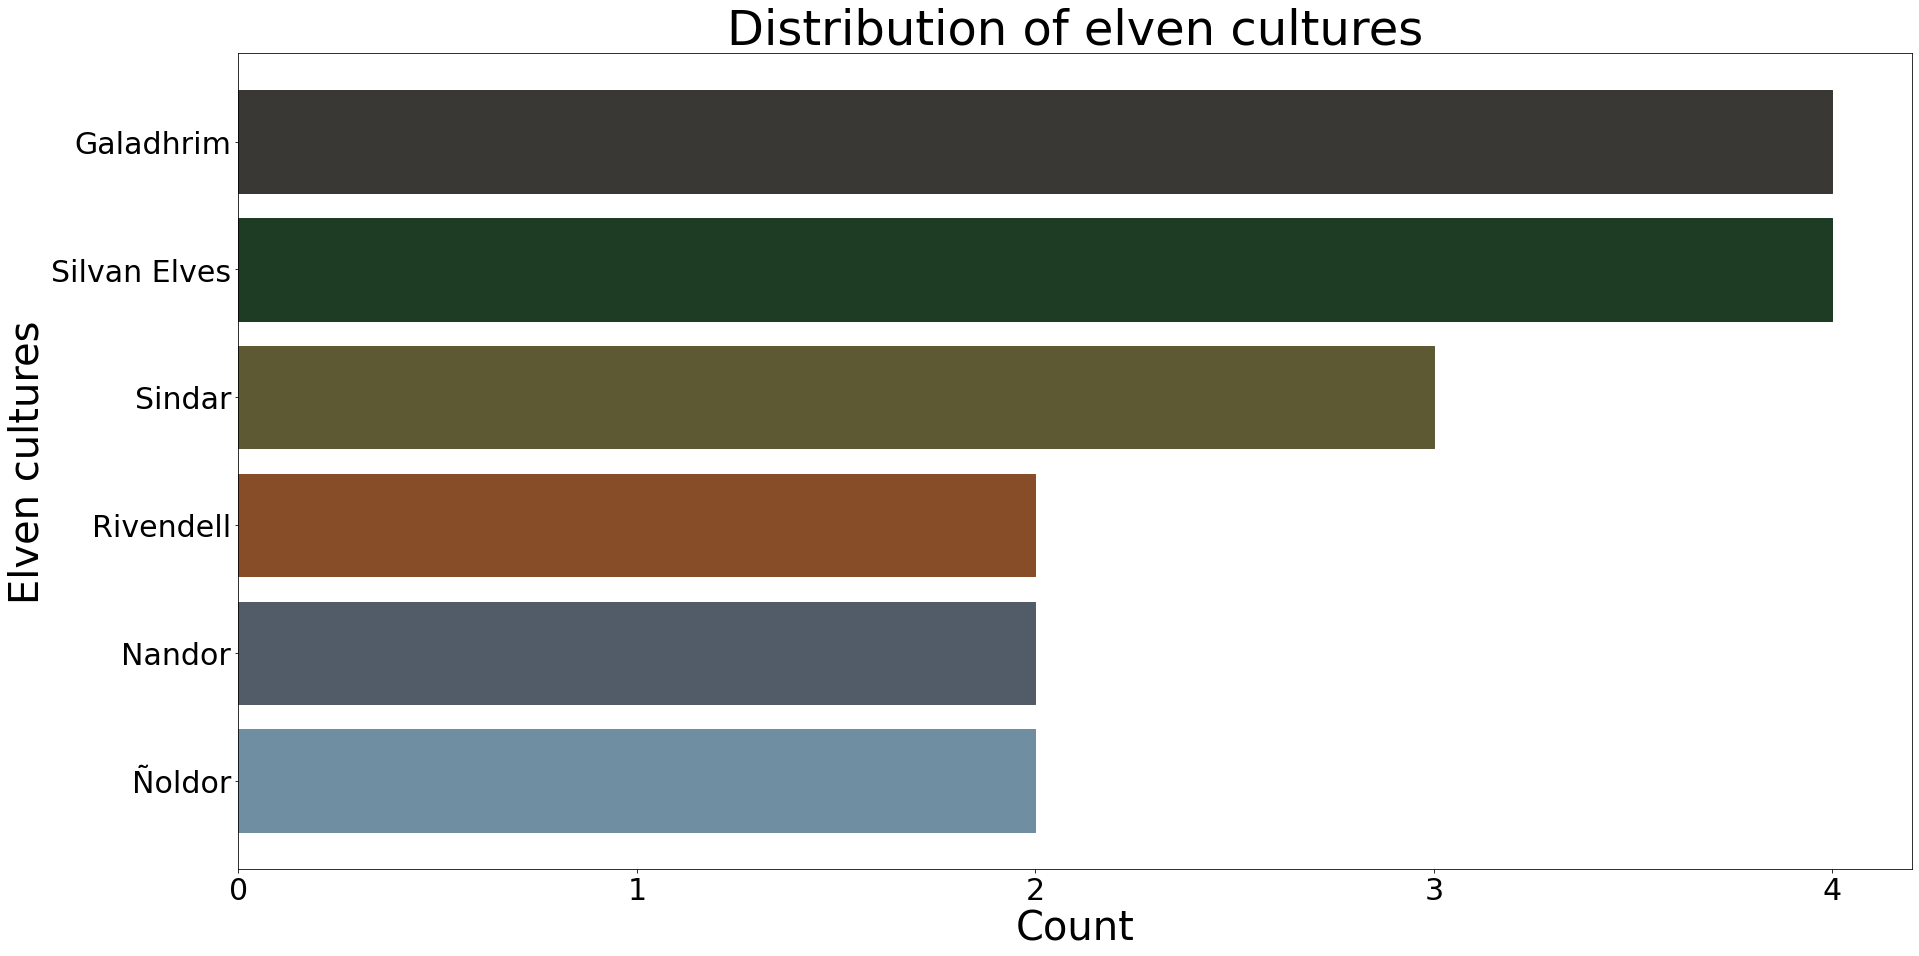

In [218]:
#A graph showing the distributing of cultures of elves
fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(list(biggestCulturesOfElf.keys()),biggestCulturesOfElf.values(),align = 'center')
ax.set_xlabel('Count')
ax.set_ylabel('Elven cultures')
ax.set_title('Distribution of elven cultures')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#Adding the pre-defined LOTR colors
for i in range(len(bars)):
   bars[i].set_color(colors[i])

plt.show()

The distribution of elven cultures is quite even. As described above there are only 15 elves listed in the Lord of the Rings wiki and they come from many different cultures.

### 3.1.3 Communities <a name="3.1.2communities"></a>

In the following cell is the code to create the partitioning of the network into communities. As this partitioning is non-deterministic, one partitioning was calculated and saved to file (partitioni.json)

In [219]:
gccUnd = gcc.to_undirected()

#computing the best partition
# partition = community_louvain.best_partition(gccUnd)

# all_partitions = list(partition.values())

# allC = dict(Counter(all_partitions))
# sorted_c = dict(sorted(allC.items()))

# print("Number of communities: ", len(sorted_c.keys()))
# print(sorted_c)


In [220]:
# with open("partition.json", "w",encoding='utf-8') as outfile:
#     json.dump(partition, outfile,ensure_ascii=False)

In [221]:
with open('partition.json',encoding='utf-8') as json_file:
    partition = json.load(json_file)

all_partitions = list(partition.values())
allC = dict(Counter(all_partitions))
sorted_c = dict(sorted(allC.items()))

In [222]:
modularity = community_louvain.modularity(partition, gccUnd)

print("The modularity of the community partitioning: ", modularity)

The modularity of the community partitioning:  0.3082285249289775


In [223]:
community_list = []
for i in allC:
    tmp = []
    for key, value in partition.items():        
        if value == i:
            tmp.append(key)
    community_list.append((i,tmp))

In [224]:
#Used for visualization
def namedPartition(community_list,degrees):
    tmp = []
    tmp1 = {}
    for item in community_list:
        i = item[0]
        members = [x for x in degrees if x[0] in item[1]]
        members.sort(key=lambda y: y[1],reverse=True)
        name = ''
        for i in range (0,min(3,len(item[1]))):
            name = name + ' ' + members[i][0]
        tmp.append((name,item[1]))
    for item in tmp:
        for member in item[1]:
            tmp1[member] = item[0]
    return tmp1


In [225]:
#Calculating posistions of nodes with force atlas 2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=100.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(gccUnd, pos=None, iterations=2000)

AttributeError: module 'fa2.fa2util' has no attribute 'Node'

In [ ]:
degrees = dict(nx.degree(gccUnd))
nx.set_node_attributes(gccUnd, name='degree', values=degrees)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(gccUnd)])
nx.set_node_attributes(gccUnd, name='adjusted_node_size', values=adjusted_node_size)

In [ ]:
# Create empty dictionaries
modularity_color = {}
#Loop through each community in the network
for member, community in partition.items():
    #For each member of the community, add their community number and a distinct color
    modularity_color[member] = Viridis8[community]

In [ ]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'
#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Viridis8
#Choose a title!
title = 'Lord of the Rings Network'

nPartition = namedPartition(community_list,gccUnd.degree)


nx.set_node_attributes(gccUnd, name='community', values=nPartition)
nx.set_node_attributes(gccUnd, modularity_color, 'modularity_color')


#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Community", "@community"),
         ("Race","@race"),
         ("Cultures","@cultures")
]
#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
            x_range=Range1d(-45.1, 40.1), y_range=Range1d(-40.1, 40.1), title=title)

#Create a network graph object
network_graph = from_networkx(gccUnd, positions, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

save(plot, filename="LortNetwork.html")

In [ ]:
# display(HTML('LortNetwork.Html'))
#Works with jupyter viewer in browser, not in VsCode
IFrame(src='/LortNetwork.html', width=700, height=600)

## 3.2 Books <a name="3.2books"></a>


## 3.3 Transcripts <a name="3.3transcripts"></a>


The following chapter covers the analysis conducted on the transcripts of the three Lord of the Rings movies. This chapter covers language processing of the three Lord of the Rings movies through word clouds for each movie and a sentiment analysis of characters, races and cultures of men. Transcripts are ideal language processing and for a sentiment analysis since they display very clearly which character in the movies says what. Let's take for example:

Gandalf: If you’re referring to the incident with the dragon, I was barely involved. All I did was give your uncle a little nudge out of the door.<br>
Frodo: Whatever you did, you’ve been officially labeled a disturber of the peace.<br>
Gandalf: Oh really? 

this has been processed into:

"frodo baggins": [" Whatever you did, you’ve been officially labeled a disturber of the peace. "]<br>
"gandalf": ["If you’re referring to the incident with the dragon, I was barely involved. All I did was give your uncle a little nudge out of the door.", "Oh really?"]

Which can then be used for the analysis



### 3.3.1 Language Processing <a name="3.3.1tranLanguage"></a>

### 3.3.2 Sentiment Analysis <a name="3.3.2tranSentiment"></a>

we used the vader .... for the ... sentiment analysis ... [add to this]

In [226]:
#The first step is to access the character dialogue which includes the transcript from 
# the three Lord of the Rings movies grouped by character.

CharacterDialogue = {}

# Opening JSON file
with open('characterDialogue.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    CharactersDialogue = data

In [227]:
analyzer = SentimentIntensityAnalyzer()
scores = []

#A sentiment score calculator
def vaderSentimentScores(preppedCharData):
    for sentence in preppedCharData:
        if sentence:
            vs = analyzer.polarity_scores(sentence)
            scores.append(vs['compound'])


    #calculating the average sentiment for each list of strings
    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen

    return scoreAvg

In [228]:
#Calculating the sentiment for each character

vaderSentScores = {}
allSentScores = {}

#Here only the sentiment of characters with more than four lines is calculated
#This is used in the happiesd and saddest character analysis since the characters
#who only have a couple of lines might scew the resutls
for key, value in CharactersDialogue.items():
    if len(value) > 5:
        sentScore = vaderSentimentScores(value)
        vaderSentScores[key] = sentScore

#sentiment of all characters with any lines
for key, value in CharactersDialogue.items():
    if len(value) > 1:
        sentScore = vaderSentimentScores(value)
        allSentScores[key] = sentScore

print("All Vader sentiment scores have been successfully calculated!")

All Vader sentiment scores have been successfully calculated!


Now that the sentiment scores have been calculated the saddest and happiest characters can be determined!

The characters "Men" and "hobbits" referr to all men and all hobbits which appear in the transcripts but do not have a specific name. For example "Crowd" and "Soldier"

In [229]:
#a sorted dictionary including the sentiment score of all 
sortedVaderScores = sorted(vaderSentScores.items(), key=lambda x: x[1])

#p#rint(sortedVaderScores)

print("10 happiest characters by using Vader: ")
VSort = []

for i in sortedVaderScores[-10:]:
    VSort.append(i[0])

VSort.reverse()
print(VSort)

print("10 saddest characters by using Vader: ")
VSortSad = []

for i in sortedVaderScores[0:10]:
    VSortSad.append(i[0])

print(VSortSad)

10 happiest characters by using Vader: 
['bilbo baggins', 'barliman butterbur', 'meriadoc brandybuck', 'boromir', 'arwen', 'frodo baggins', 'elrond', 'galadriel', 'aragorn ii elessar', 'peregrin took']
10 saddest characters by using Vader: 
['shagrat', 'men', 'leowyn', 'ring', 'hobbits', 'gothmog (lieutenant of morgul)', 'orcs', 'saruman', 'legolas', 'gorbag']


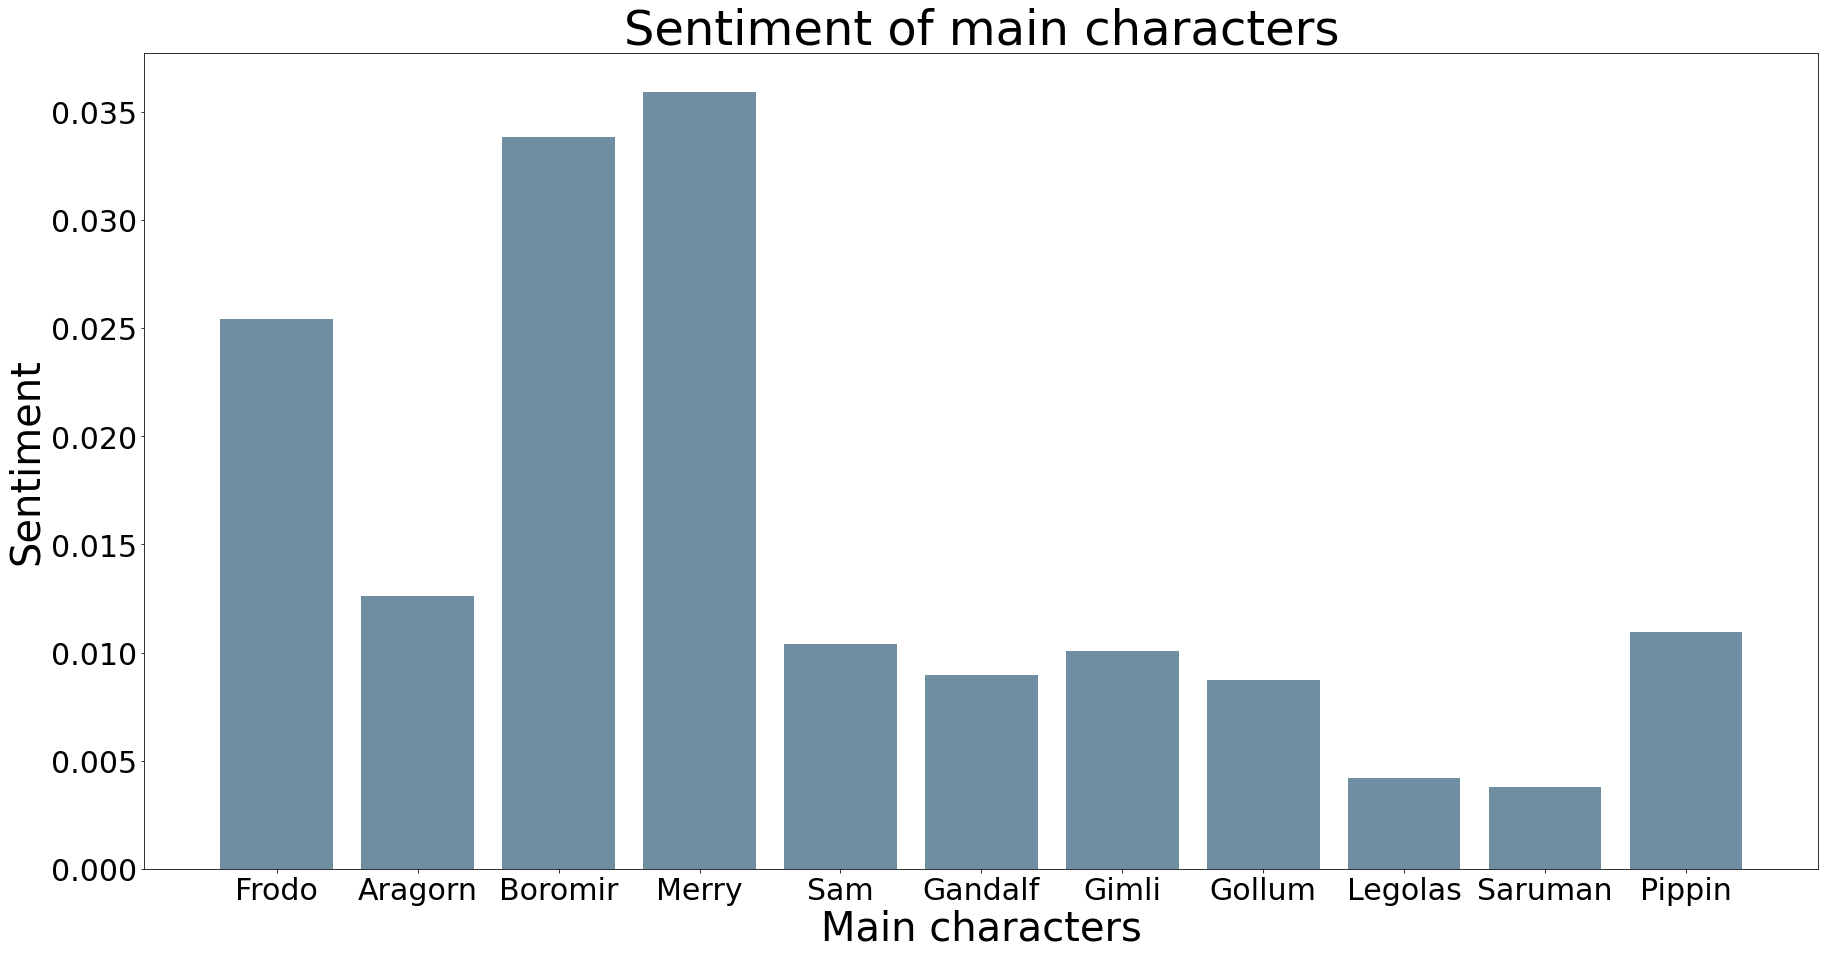

In [230]:
#Sentiment analysis for main characters
chosenCharacters = ['frodo baggins','aragorn ii elessar','boromir','meriadoc brandybuck','samwise gamgee','gandalf','gimli','gollum','legolas','saruman','peregrin took']
characterNames = ['Frodo','Aragorn','Boromir','Merry','Sam','Gandalf','Gimli','Gollum','Legolas','Saruman','Pippin']

chosenCharList = []

#The transcript for each of the characters defined is fed into the sentimen score calculatr
for scores in chosenCharacters:
    chosenCharList.append(vaderSentScores[scores])

fig,ax = plt.subplots(figsize=(30,15))
bars = ax.bar(characterNames,chosenCharList,align = 'center',color = '#708ea2')
ax.set_xlabel('Main characters')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment of main characters')

plt.show()

Merry, an intelligent hobbit with a fondness for boats and ponies, is the happiest of the main characters. This fits the movies well since Merry is known for thinking and talking about food even in the most dangerous situations. Merries knack for complementing others, especially his dear friend Pippin also has an affect of his sentiment score.

Boromir, a warrior of Gondor, has the second highest sentiment but for a very different reason than Merry. He does not speak about food, instead he uses words like faith, glory and kings which influence his sentiment score for the better.

In [231]:
# Opening JSON file including all the characters categorized by race
with open('races.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    races = data

In [232]:
raceScores = {}
charScores = []
raceSentiment = {}

#calculate the sentiment score per race 
for key, value in races.items():
    if len(value) > 1:
        for char in value:
            if char in allSentScores:
                charScores.append(allSentScores[char])


    scoreLen = len(charScores)
    scoreSum = sum(charScores)
    scoreAvg = scoreSum /scoreLen
    raceSentiment[key] = scoreAvg

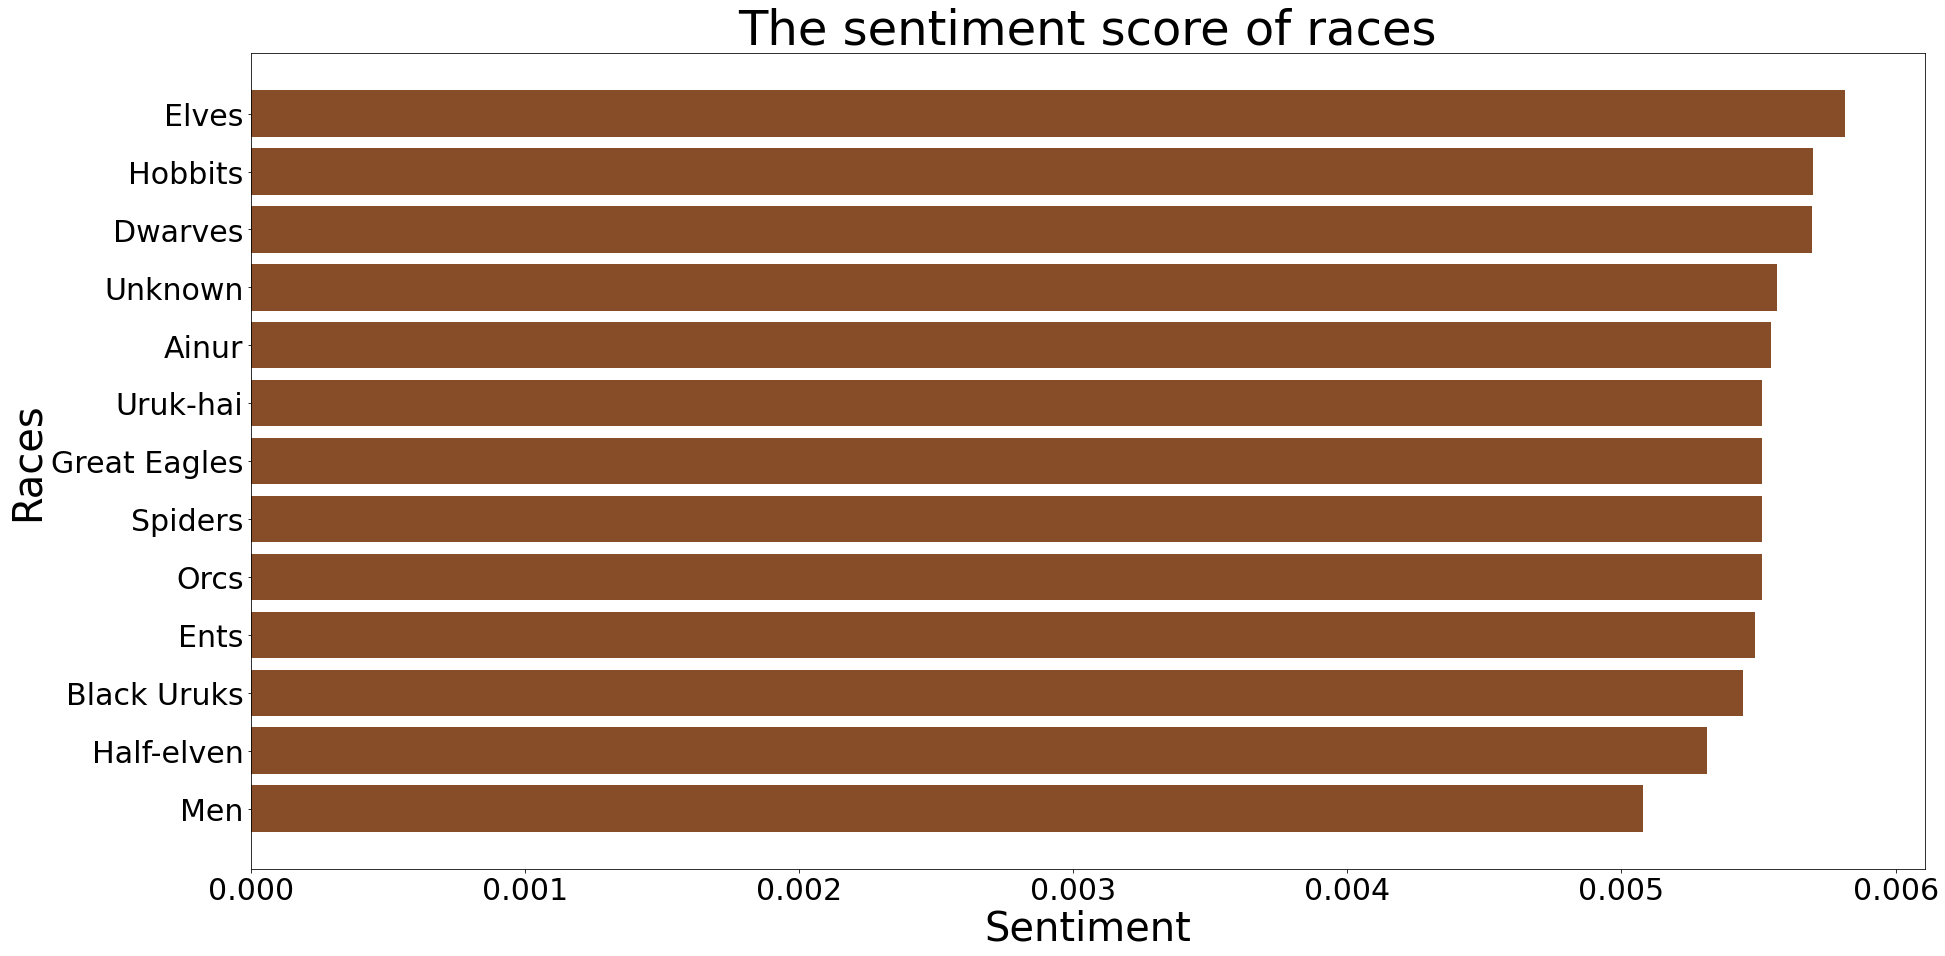

In [233]:

#sort thecentiment scores from highest to lowest
sortedRaceSentiment = collections.OrderedDict(sorted(raceSentiment.items(), key=lambda t: t[1]))

#Plot the sentiment score of each race 
fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(list(sortedRaceSentiment.keys()),sortedRaceSentiment.values(),align = 'center',color = '#874d28')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Races')
ax.set_title('The sentiment score of races')

plt.show()

All three Lord of the Rings movies have an overwhelming amount of hardship versus happiness. It therefore does not come as a surprise that the sentiments of all races is quite low. There seems to be little difference between the highest and lowest sentiments of races. This can be explained by the fact that the precence of hardship and pain is mirrored in both the sentiment of the cause, for example Orks or Uruk-hai, but also in the races who suffer, such as hobbits and men (in some cases, not all).

In [234]:
with open('culturesOfMen.json', encoding="utf8") as json_file:
    data = json.load(json_file)
    culturesOfMen = data

In [235]:
menScores = []
menSentiment = {}

#Calculating the sentiment score for the cultures of men
for key, value in culturesOfMen.items():
    for char in value:
        if char in allSentScores:
            menScores.append(allSentScores[char])

    scoreLen = len(menScores)
    scoreSum = sum(menScores)
    scoreAvg = scoreSum /scoreLen
    menSentiment[key] = scoreAvg

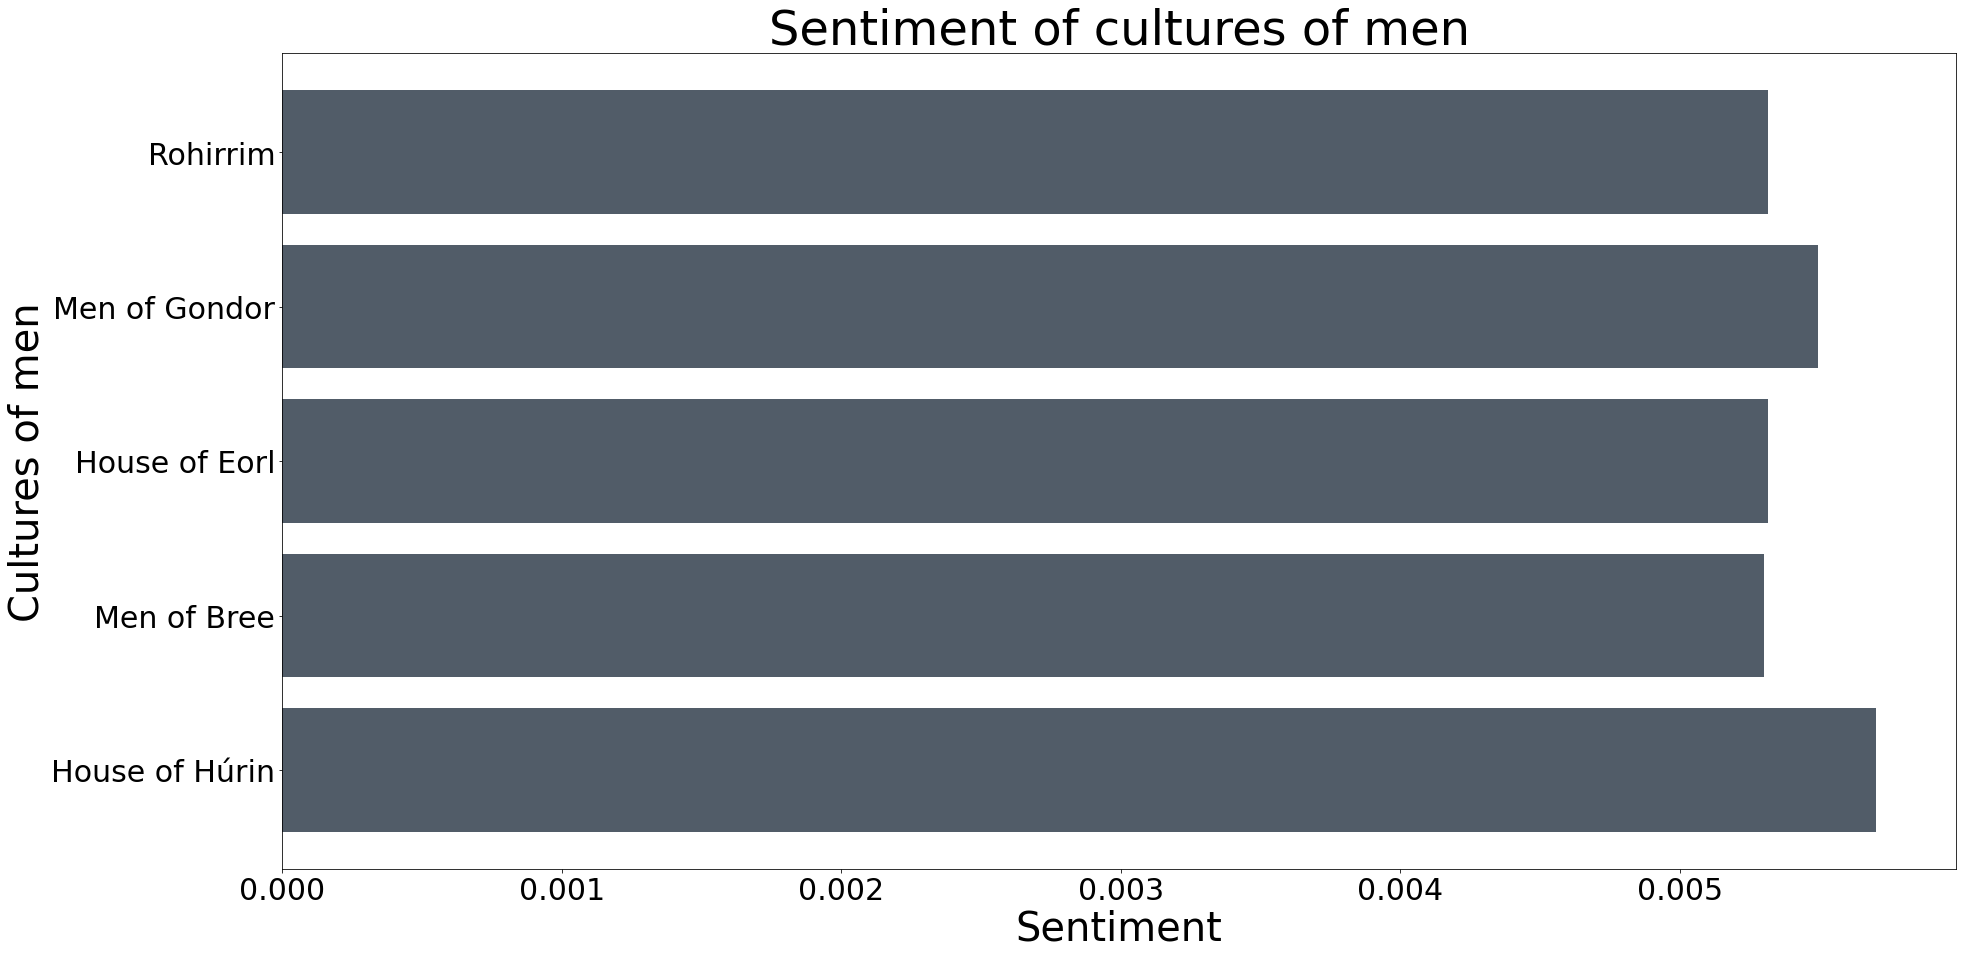

In [236]:
#sortedRaceSentiment = collections.OrderedDict(raceSentiment.items())
#sortedRaceSentiment = collections.OrderedDict(sorted(raceSentiment.items(), key=lambda t: t[1]))
chosenCharacters = ['House of Húrin','Men of Bree','House of Eorl','Men of Gondor','Rohirrim']

charList = []

for scores in chosenCharacters:
    charList.append(menSentiment[scores])

fig,ax = plt.subplots(figsize=(30,15))
bars = ax.barh(chosenCharacters,charList,align = 'center',color = '#515c68')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Cultures of men')
ax.set_title('Sentiment of cultures of men')

# for i in range(len(bars)):
#    bars[i].set_color(colors[i])
#ax.set_xscale('log')
plt.show()

Taking a look at the sentimen scores of the most common cultures of men it can be seen that the scores are very similar. The house of Húrin and the men of Gondor have slightly higher scores. Boromin, main character with the second highest sentiment score and the fourth highest sentiment score of any character, is a member of bith of these cultures which might explain the slight increas in positive sentiment. 

## 3.4 Comparison - Books and Movies <a name="3.4booksmovies"></a>

### 3.4.1 Language Processing  <a name="3.4.1booksmoviesLang"></a>

In [237]:
#add language processing comparisons

### 3.4.2 Sentiment Analysis  <a name="3.4.2booksmoviesSent"></a>

In [239]:
 #Transcripts of the three movies
with open("transcripts/" + 'Fotr_parsed_cleaned2.txt' ,encoding='utf-8') as f:
    fellowshipScript = f.read()

with open("transcripts/" + '2t_parsed_and_cleaned.txt' ,encoding='utf-8') as f:
    towersScript = f.read()

with open("transcripts/" + 'RotK_parsed_and_cleaned.txt' ,encoding='utf-8') as f:
    kingScript = f.read()

In [243]:
analyzer = SentimentIntensityAnalyzer()
scores = []

#A function for calculating  Vader sentiment scores
def movieVaderSentimentScores(preppedCharData):
    
    for sentence in preppedCharData:
        if sentence:
            vs = analyzer.polarity_scores(sentence)
            scores.append(vs['compound'])

    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen

    return scoreAvg

scripts = [fellowshipScript, towersScript, kingScript]
averageMovieSentiment = []

#Feed transcript data to the sentiment score calculator
for script in scripts:
    lines = script.splitlines()
    averageMovieSentiment.append(movieVaderSentimentScores(lines))


Text(0, 0.5, 'Sentiment')

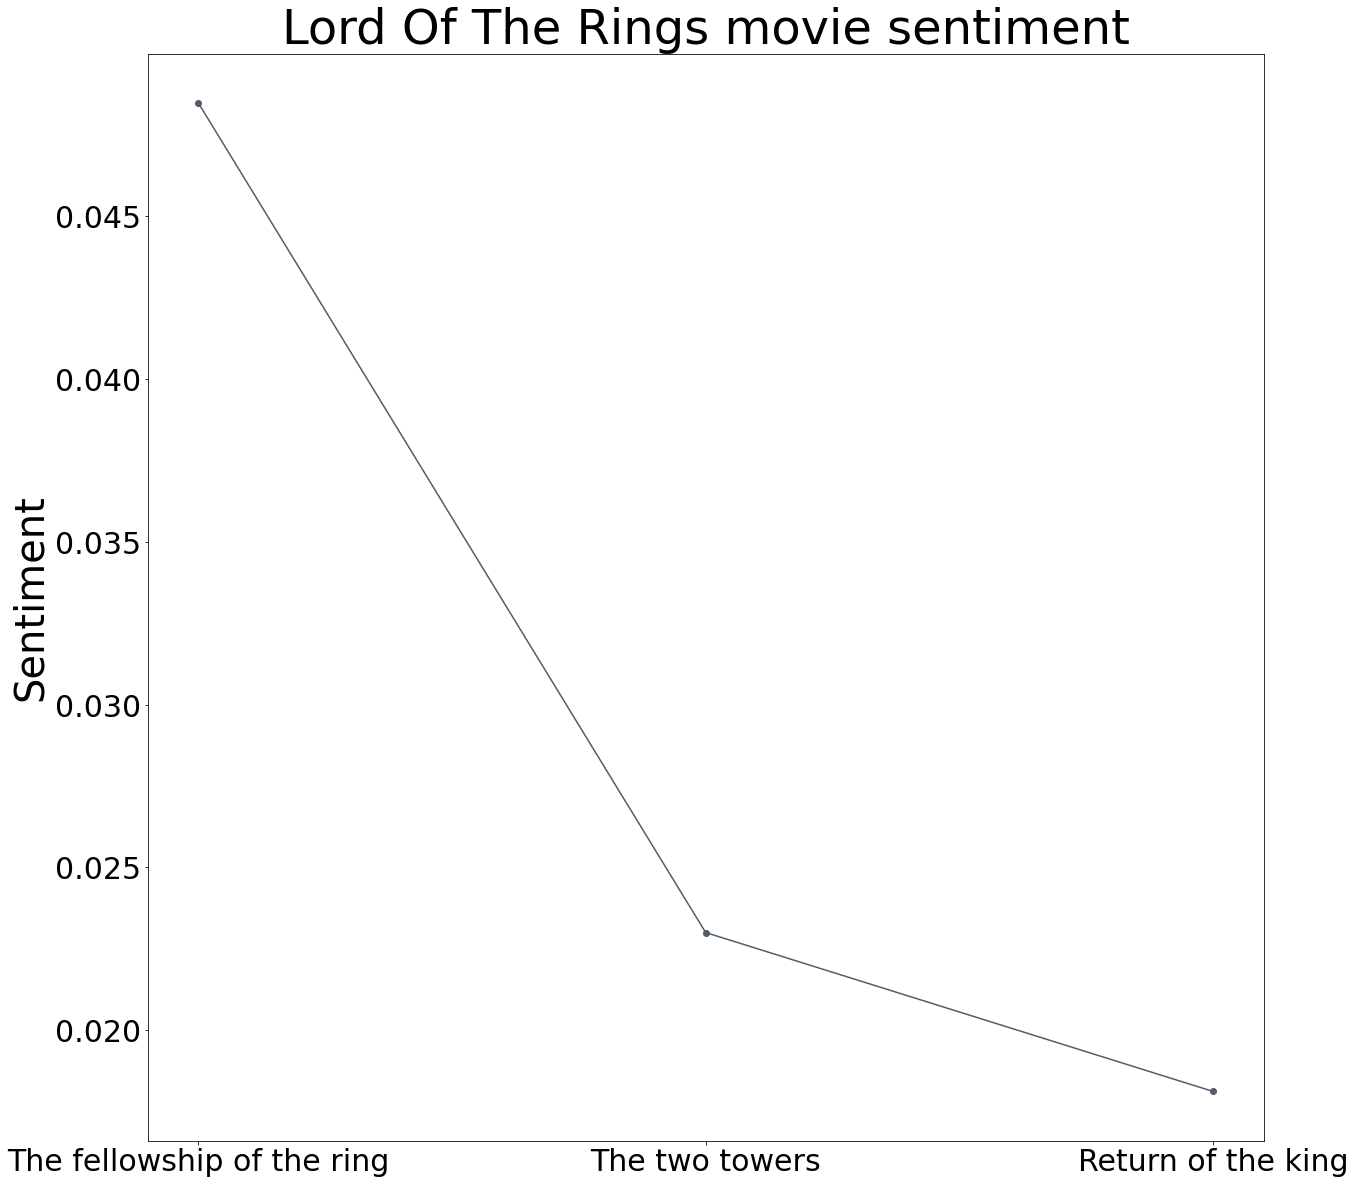

In [244]:
#plotting the sentiment of the three movies
fig, ax = plt.subplots(figsize=(20,20))
title = ["The fellowship of the ring", "The two towers", "Return of the king"]

ax.plot(title, averageMovieSentiment, 'o-', color="#515c68")
ax.set_title('Lord Of The Rings movie sentiment')
ax.set_ylabel('Sentiment')

# 4. Discussion <a name="discussion"></a>

* What went well?
* What is still missing? What could be improved?, Why?

# 5. Contributions <a name="contributions"></a>

* You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That’s what you should explain).
* It is not OK simply to write "All group members contributed equally".

![Alt Text](https://i.imgur.com/2TxUe1G.gif)